## Random Forest classifier for ClimateWin data 

### Script Content 
#### 1. Import libraries and dataset
#### 2. Recducing the dataset (2010-2019)
#### 3. Data preparation
#### 4. Splitting the data
#### 5. Training a Random Forest Classifier
#### 6. Importance Analysis 

## 1. Import Libraries & Data set

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.metrics import accuracy_score

2025-08-06 14:37:01.874402: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
# define path
path = r'/Users/tanu/Desktop/Data Analytics/ML with python/Data'

In [6]:
df = pd.read_csv(os.path.join(path,'weather_cleaned.csv'))

In [7]:
df

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,0.85,1.0180,0.32,0.09,0.7,6.5,0.8,...,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,19600102,1,6,0.84,1.0180,0.36,1.05,1.1,6.1,3.3,...,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,19600103,1,8,0.90,1.0180,0.18,0.30,0.0,8.5,5.1,...,4.1,7,0.91,1.0096,0.17,0.08,0.1,10.5,8.1,12.9
3,19600104,1,3,0.92,1.0180,0.58,0.00,4.1,6.3,3.8,...,2.3,7,0.86,1.0184,0.13,0.98,0.0,7.4,7.3,10.6
4,19600105,1,6,0.95,1.0180,0.65,0.14,5.4,3.0,-0.7,...,4.3,3,0.80,1.0328,0.46,0.00,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,1,0.79,1.0248,1.34,0.22,7.7,15.9,11.4,...,14.2,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5
22946,20221028,10,6,0.77,1.0244,1.34,0.22,5.4,16.7,14.3,...,14.3,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5
22947,20221029,10,4,0.76,1.0227,1.34,0.22,6.1,16.7,13.1,...,14.4,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5
22948,20221030,10,5,0.80,1.0212,1.34,0.22,5.8,15.4,11.6,...,12.4,5,0.82,1.0142,1.13,0.41,3.4,10.7,7.9,13.5


In [8]:
# Import the 'Pleasant weather' dataset

pw = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [9]:
pw

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 2. Reducing for recent decade (2010-2019)

In [11]:
# Reducing the data for recent decade( 2010 to 2019)

df_201 = df[
    (df['DATE'].astype(str).str[:4] >= '2010') &
    (df['DATE'].astype(str).str[:4] <= '2019')
]
df_201

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
18263,20100101,1,8,0.93,0.9965,0.18,0.56,0.0,2.9,-0.2,...,-7.0,1,0.80,1.0121,0.43,0.00,6.0,1.7,-1.6,5.0
18264,20100102,1,3,0.74,1.0193,0.58,0.00,5.2,-1.5,-4.2,...,-7.1,1,0.82,1.0196,0.45,0.00,6.0,0.8,-4.5,6.2
18265,20100103,1,3,0.75,1.0226,0.61,0.00,6.3,-3.2,-6.0,...,-7.1,4,0.71,1.0196,0.36,0.41,1.6,0.5,-4.1,5.1
18266,20100104,1,5,0.83,1.0169,0.48,0.00,3.7,-4.9,-8.3,...,-3.6,2,0.67,1.0219,0.48,0.51,6.5,3.7,1.3,3.8
18267,20100105,1,7,0.78,1.0073,0.53,0.04,4.4,-4.0,-7.1,...,-5.5,4,0.78,1.0117,0.45,0.09,4.7,2.3,-0.7,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21910,20191227,12,8,0.92,1.0273,0.15,0.52,0.1,6.8,5.6,...,0.2,5,0.82,1.0142,0.04,0.41,3.4,10.7,7.9,13.5
21911,20191228,12,7,0.86,1.0380,0.35,0.00,1.3,3.7,-0.6,...,-1.0,5,0.82,1.0142,0.20,0.41,3.4,10.7,7.9,13.5
21912,20191229,12,6,0.93,1.0387,0.61,0.00,4.9,-0.8,-2.7,...,5.8,5,0.82,1.0142,0.24,0.41,3.4,10.7,7.9,13.5
21913,20191230,12,1,0.81,1.0354,0.64,0.00,6.5,0.5,-3.0,...,9.6,5,0.82,1.0142,0.06,0.41,3.4,10.7,7.9,13.5


In [12]:
# Redude the pleasant weather data too (from 2010 to 2019)

pw_201 = pw[
        (pw['DATE'].astype(str).str[:4] >= '2010') &
        (pw['DATE'].astype(str).str[:4] <= '2019')
]
pw_201

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
18263,20100101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18264,20100102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18265,20100103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18266,20100104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18267,20100105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21910,20191227,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21911,20191228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21912,20191229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21913,20191230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 3. Data Preparation 

In [14]:
# Set display options to show all rows

pd.set_option('display.max_rows', None)

In [15]:
# Extract stations list

stations = [col.split('_')[0] for col in df_201.columns if '_' in col]

In [16]:
# Create a set of unique station names

unique_stations = set(stations)
unique_stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [17]:
# Create a dictionary to store the frequency of entries for each station
station_frequencies = {}

for station in unique_stations:
    # Select columns that belong to the current station
    station_columns = [col for col in  df_201.columns if col.startswith(station)]
    
    # Count non-missing entries across all columns for the station
    station_frequencies[station] =  df_201[station_columns].notna().sum().sum()

# Print the frequency of entries for each station
print("Frequency of entries for each weather station:")
for station, freq in station_frequencies.items():
    print(f"{station}: {freq} entries")

Frequency of entries for each weather station:
HEATHROW: 32868 entries
BELGRADE: 32868 entries
MADRID: 32868 entries
VALENTIA: 32868 entries
OSLO: 32868 entries
DUSSELDORF: 32868 entries
STOCKHOLM: 32868 entries
MUNCHENB: 32868 entries
BASEL: 32868 entries
MAASTRICHT: 32868 entries
DEBILT: 32868 entries
KASSEL: 32868 entries
SONNBLICK: 32868 entries
LJUBLJANA: 32868 entries
BUDAPEST: 32868 entries


In [18]:
### All stations have same number of rows (32868)

## 4. Splitting the dataset

In [20]:
# drop DATE and MONTH for your random forest

X = df_201.drop(columns=['DATE', 'MONTH']) 
y = pw_201.drop(columns = 'DATE')
print(X.shape, y.shape)

(3652, 135) (3652, 15)


In [21]:
# split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [22]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 135) (2739, 15)
(913, 135) (913, 15)


## 6. Random Forest Model

In [24]:
# Create RF Classifier

clf = RandomForestClassifier(n_estimators = 100)#, max_depth = 5

# Training the model on the training data set
# fit function is used to train the model using th etraining sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [25]:
# Perform prediction on the the test dataset
y_pred = clf.predict(X_test)

# Use metrics module for accuracy calculation
print('Model Accuracy:',metrics.accuracy_score(y_test, y_pred))

Model Accuracy: 0.5991237677984665


#### Model Accuracy : 60%

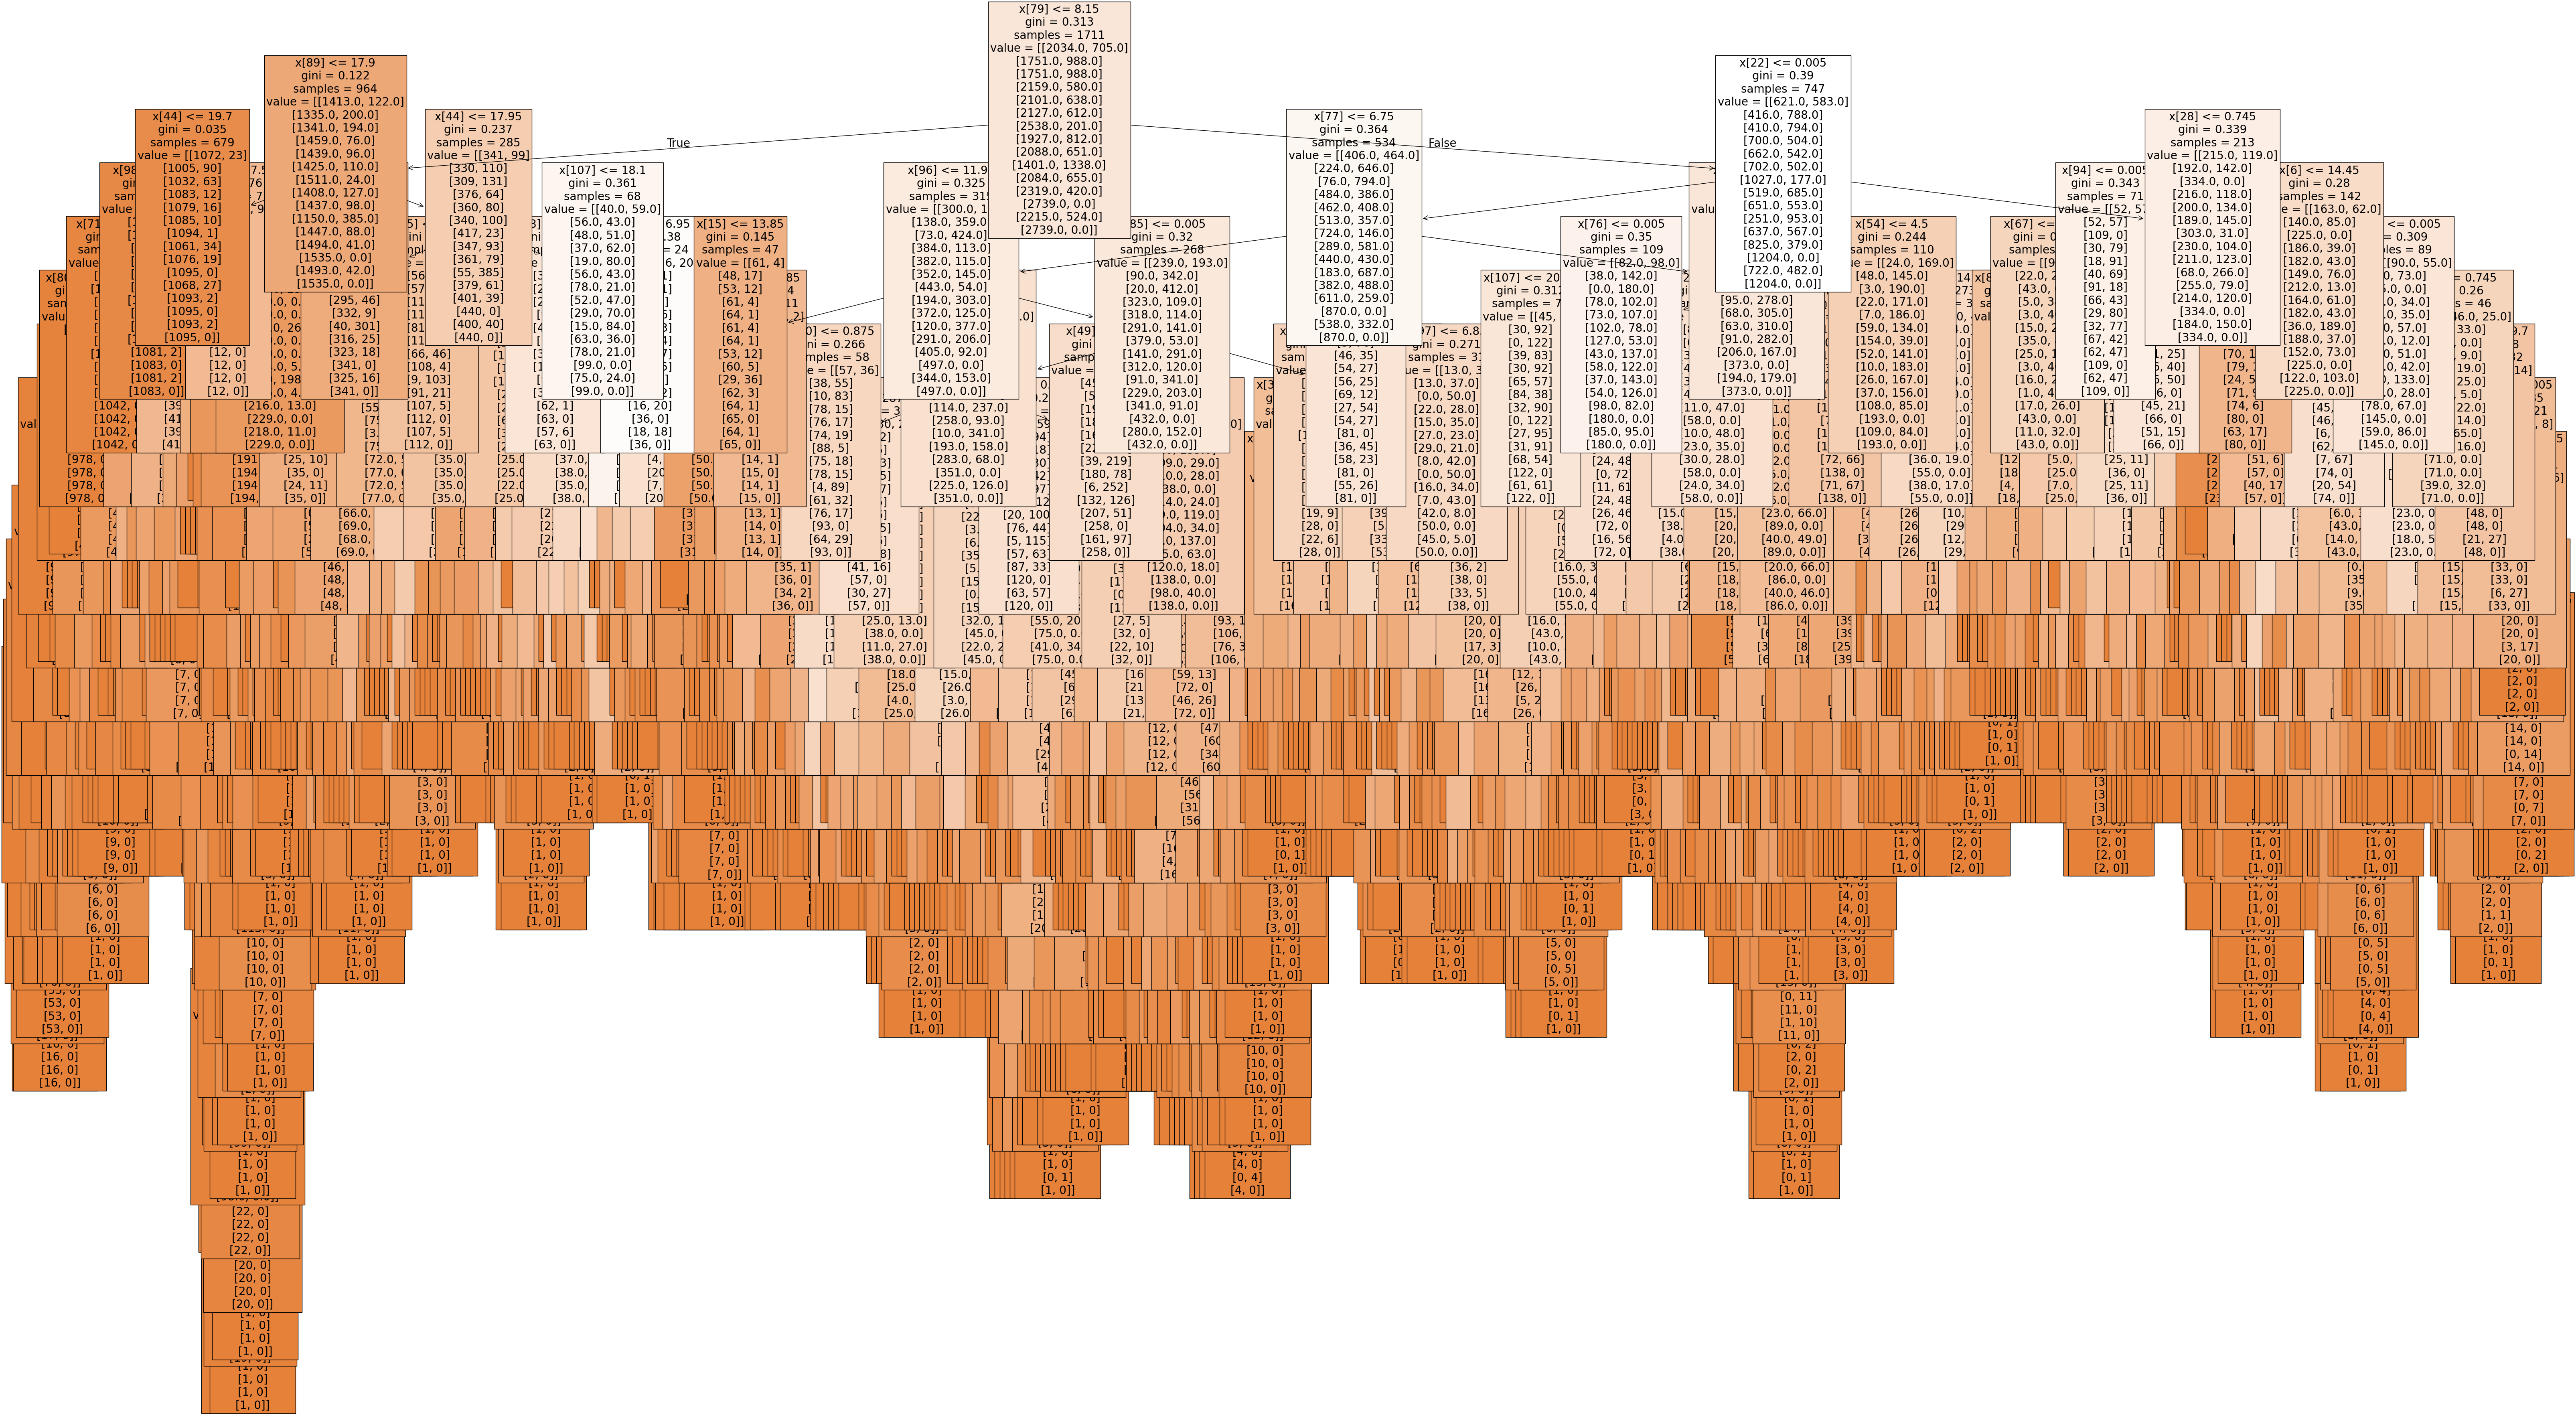

In [27]:
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[15], fontsize = 20, filled=True);

In [67]:
# save the figure
fig.savefig(os.path.join(path, 'Random_Forest_2010-2019_All_Stations.png'),bbox_inches='tight')

## 7. Feature Importance Analysis

In [30]:
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(135,)


array([4.46656933e-03, 3.71140887e-03, 3.53867614e-03, 3.29069544e-03,
       1.93969202e-02, 8.75818244e-03, 2.66605924e-02, 8.15036507e-03,
       3.63173143e-02, 4.24066572e-03, 3.37627439e-03, 3.79318226e-03,
       2.88942443e-03, 1.55204568e-02, 3.16395307e-03, 7.77471731e-03,
       3.67458317e-03, 8.21167533e-03, 3.47848927e-04, 0.00000000e+00,
       0.00000000e+00, 1.59442527e-03, 1.34705293e-02, 1.68678314e-03,
       1.40196003e-02, 9.31073142e-03, 1.86334516e-02, 2.60667450e-03,
       3.34900409e-03, 4.57053900e-03, 4.15857153e-03, 1.48200709e-02,
       4.66755744e-03, 8.24986833e-03, 3.18214928e-03, 3.02481829e-02,
       2.91073774e-03, 2.97869518e-03, 4.50201781e-03, 3.91421309e-03,
       2.03697451e-02, 7.78217451e-03, 1.16521362e-02, 2.86353634e-03,
       4.65286556e-02, 2.90274527e-03, 4.26330248e-03, 3.90882657e-03,
       4.24906345e-03, 1.03850294e-02, 4.57338181e-03, 1.34406513e-02,
       4.94690522e-03, 1.99383191e-02, 4.08169831e-03, 2.56831714e-03,
      

In [31]:
# Reshape newarray

newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[4.46656933e-03, 3.71140887e-03, 3.53867614e-03, 3.29069544e-03,
         1.93969202e-02, 8.75818244e-03, 2.66605924e-02, 8.15036507e-03,
         3.63173143e-02],
        [4.24066572e-03, 3.37627439e-03, 3.79318226e-03, 2.88942443e-03,
         1.55204568e-02, 3.16395307e-03, 7.77471731e-03, 3.67458317e-03,
         8.21167533e-03],
        [3.47848927e-04, 0.00000000e+00, 0.00000000e+00, 1.59442527e-03,
         1.34705293e-02, 1.68678314e-03, 1.40196003e-02, 9.31073142e-03,
         1.86334516e-02],
        [2.60667450e-03, 3.34900409e-03, 4.57053900e-03, 4.15857153e-03,
         1.48200709e-02, 4.66755744e-03, 8.24986833e-03, 3.18214928e-03,
         3.02481829e-02],
        [2.91073774e-03, 2.97869518e-03, 4.50201781e-03, 3.91421309e-03,
         2.03697451e-02, 7.78217451e-03, 1.16521362e-02, 2.86353634e-03,
         4.65286556e-02],
        [2.90274527e-03, 4.26330248e-03, 3.90882657e-03, 4.24906345e-03,
         1.03850294e-02, 4.57338181e-03, 1.34406513e-02, 4.94690522

In [32]:
# Collapse this shape into one observation for each weather station

sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.11429072, 0.05264493, 0.05906337, 0.07585262, 0.10350191,
       0.06860822, 0.03084029, 0.07257769, 0.11601217, 0.06105385,
       0.09754018, 0.05102414, 0.03834911, 0.05313781, 0.00550299])

In [33]:
# Convert the set of unique stations to a list

unique_stations_list = list(unique_stations)

In [34]:
important = pd.Series(sumarray, index = unique_stations_list)
important = important.sort_values(ascending = False)
important

BASEL         0.116012
HEATHROW      0.114291
OSLO          0.103502
DEBILT        0.097540
VALENTIA      0.075853
MUNCHENB      0.072578
DUSSELDORF    0.068608
MAASTRICHT    0.061054
MADRID        0.059063
LJUBLJANA     0.053138
BELGRADE      0.052645
KASSEL        0.051024
SONNBLICK     0.038349
STOCKHOLM     0.030840
BUDAPEST      0.005503
dtype: float64

In [35]:
# Create a df to associate weather stations with their importances

df_importance = pd.DataFrame({
    'Weather Station': unique_stations_list,
    'Importance': sumarray
})

df_importance = df_importance.sort_values(by='Importance', ascending = False)

['HEATHROW', 'BELGRADE', 'MADRID', 'VALENTIA', 'OSLO', 'DUSSELDORF', 'STOCKHOLM', 'MUNCHENB', 'BASEL', 'MAASTRICHT', 'DEBILT', 'KASSEL', 'SONNBLICK', 'LJUBLJANA', 'BUDAPEST']


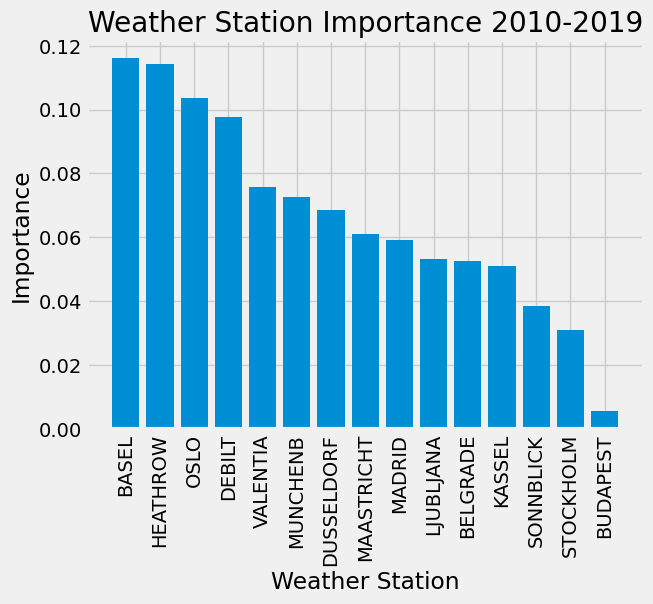

In [36]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
print(unique_stations_list)

plt.bar(df_importance['Weather Station'], df_importance['Importance'], orientation = 'vertical')
plt.xticks(rotation='vertical')
plt.xlabel('Weather Station')
plt.ylabel('Importance')
plt.title('Weather Station Importance 2010-2019')

plt.show()

In [37]:
# Save the figure
plt.savefig(os.path.join(path,'2010-2019_feauture_importances.png'), bbox_inches='tight')